## Assignment 3 PAMAP2 Dataset

## Index

1.Introduction
   -Objectives
2.Data Overview
3.Data cleansing
4.Segmentation
5.Exloratory Data Analysis
6.Hypothesis Testing
7.Modelling - PCA - CLustering
   -Training data using HR
   -Training data using HR + monitor
   -Training data using monitor
   -Training data using gyroscope
   -Training data using gyroscope + monitor
   -Training data using ankle monitor
   -Training data using chest monitor
   -Training data using hand monitor
8.Conclusion 
9.Reference

# INTRODUCTION

Human activity recognition is one of the most relevant research areas for the field of machine learning as it can provide greater surveillance of chronic diseases, diseases that could be triggered and predict the long-term outcome.

Nonetheless, it is still a very challenging task, due to unsolvable problems such as sensor movement, sensor location, or unforeseen events in the environment.

For this test, data will be extracted from  the HAR hardware for everyday fitness tracking of 12 activities defined in the protocol in 9 subjects with 3 IMU and 1 HR monitors, with the aim of providing a comparative evaluation of predictive models and choosing the best fit. And for this,  were set the following objectives:

# OBJECTIVES

1)To identify parameters that can be associated with activity intensity. Based on how much energy they use, the dataset's activities can be categorised as light, moderate, or strong. Knowing the intensity of the activities helps users determine whether they are engaging in the prescribed amounts of physical exercise.

2)Evaluate the effectiveness of different sensing devices when used to identify physical activity. To determine which one contributes more to activity recognition, the performance of the accelerometer and gyroscope data will be compared in detail. This is helpful because it enables the construction of tracking devices that are more effective.

3)Compare the performance of different sensor positions provided in the dataset, i.e. hand, ankle and chest sensors, in order to redesign activity tracking devices more accurately.

# DATA OVERVIEW

In [90]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import cluster
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn import svm
import csv
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

The table above provides general information on each of the subjects in the sample. However, it should be noted that there is only one woman and that, in addition, there is only one left handed person.

In addition, we were provided with information on the activity ID, the activity itself and the intensity classification.

We build a maintable from each subject's.dat files, in order to visualise the data in relation to the actions performed for each participants. The table is an iteration that goes over each document and stores it in a pandas dataframe.

In [91]:
#creating the list for the subjects and there attributes.

subject_information = { 
"Subject ID": [101,102,103,104, 105, 106, 107, 108, 109],
"Sex":['Male','Female','Male','Male','Male','Male','Male','Male','Male'],
"Age (years)":[27,25,31,24,26,26,23,32,31],
"Height (cm)": [182,169,187,194,180,183,173,179,168],
"weight (kg)" : [83,78,92,95,73,69,86,87,65],
"resting HR (bpm)" : [75,74,68,58,70,60,60,66,54],
"Max HR (bmp)" : [193,195,189,196,194,194,197,188,189],
"Dominant Hand" : ['right','right','right','right','right','right','right','left','right'],
}
table=pd.DataFrame(subject_information)
table

,Subject ID,Sex,Age (years),Height (cm),weight (kg),resting HR (bpm),Max HR (bmp),Dominant Hand
0,101,Male,27,182,83,75,193,right
1,102,Female,25,169,78,74,195,right
2,103,Male,31,187,92,68,189,right
3,104,Male,24,194,95,58,196,right
4,105,Male,26,180,73,70,194,right
5,106,Male,26,183,69,60,194,right
6,107,Male,23,173,86,60,197,right
7,108,Male,32,179,87,66,188,left
8,109,Male,31,168,65,54,189,right


In [92]:
clasification_cb = { 
"activityID": [1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24,0],
"activity":["lying","sitting","standing","walking","running","cycling","Nordic walking","watching TV","computer work","car driving","ascending stairs","descending stairs","vacuum cleaning","ironing","folding laundry","house cleaning","playing soccer","rope jumping","other (transient activities)"],
"intensity":["ligh","ligh","ligh","moderate","vigorous","moderate","moderate","-","-","-","moderate","moderate","light","light","-","-","-","vigorous","-"]   
}

IDactivity= pd.DataFrame(clasification_cb)
IDactivity


,activityID,activity,intensity
0,1,lying,ligh
1,2,sitting,ligh
2,3,standing,ligh
3,4,walking,moderate
4,5,running,vigorous
5,6,cycling,moderate
6,7,Nordic walking,moderate
7,9,watching TV,-
8,10,computer work,-
9,11,car driving,-


The table above provides general information on each of the subjects in the sample. However, it should be noted that there is only one woman and that, in addition, there is only one left handed person.

In addition, we were provided with information on the activity ID, the activity itself and the intensity classification.

In [98]:
# data loading

list_of_files = ['/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject101.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject102.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject103.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject104.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject105.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject106.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject107.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject108.dat',
                 '/Users/ptrau/Desktop/Final Assigment/Dataset/Protocol/subject109.dat' ]


In [99]:
subjectID = [1,2,3,4,5,6,7,8,9]

# Dictionary representing the activityID and corresponding tags numbers.
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

# The column_names list with three column names: "timestamp", "activityID", and "heartrate".
colNames = ["timestamp", "activityID","heartrate"]

# Hand IMU parameters
IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

# IMU Chest parameters
IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

# IMU Ankle parameters
IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

 #all columns in one list
columns = colNames + IMUhand + IMUchest + IMUankle 

len(columns)

54

In [100]:
# creating a dataframe from subjects list
PAMAP2=pd.DataFrame()
for subject in list_of_files:
    df = pd.read_table(subject, sep='\s+')
    df.columns = columns
    df['subject_id'] = subject[-7:-4]
    PAMAP2 = PAMAP2.append(df, ignore_index=True)

In [101]:
# shape of the dataframe
print("Number of rows and columns = {}".format(PAMAP2.shape))
PAMAP2

Number of rows and columns = (2872524, 55)


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
1,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
2,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
3,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
4,8.43,0,NaN,30.0000,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.87780,-58.397700,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872519,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872520,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872521,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872522,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


In [102]:
PAMAP2 = PAMAP2.drop(PAMAP2[PAMAP2['activityID'] == "transient activity"].index)

#  DATA CLEANSING

After having observed the data, it is decided to clean all the Nan values of the columns, specifically the heartrate column.

In [103]:
PAMAP2.describe(include = 'all')

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,2.872524e+06,2.872524e+06,262265.000000,2.859383e+06,2.859383e+06,2.859383e+06,2.859383e+06,2.859383e+06,2.859383e+06,2.859383e+06,...,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2.860775e+06,2872524
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446999
mean,1.834360e+03,5.466260e+00,109.872522,3.265258e+01,-4.960792e+00,3.587753e+00,3.168421e+00,-4.889425e+00,3.584262e+00,3.349484e+00,...,-3.450123e-02,7.752174e-03,-3.272101e+01,1.593297e+00,1.689044e+01,3.986420e-01,2.154751e-02,3.091536e-01,-1.878806e-02,NaN
std,1.105686e+03,6.331336e+00,25.870048,1.844268e+00,5.985030e+00,6.277844e+00,3.843921e+00,5.992727e+00,6.055755e+00,3.840648e+00,...,5.966035e-01,1.842555e+00,1.887861e+01,2.161180e+01,2.030852e+01,3.034559e-01,5.691301e-01,3.237875e-01,4.731372e-01,NaN
min,5.650000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,NaN
25%,8.931700e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290260e+00,9.685885e-01,-8.933265e+00,1.284680e+00,1.164040e+00,...,-8.267115e-02,-3.084625e-01,-4.289480e+01,-1.148540e+01,3.289345e+00,1.563440e-01,-5.839910e-01,1.087100e-02,-5.047580e-01,NaN
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788150e+00,3.570830e+00,2.958420e+00,-5.737630e+00,3.613430e+00,3.132860e+00,...,-4.249850e-03,-2.215990e-03,-3.390020e+01,1.362640e+00,1.809110e+01,3.197560e-01,0.000000e+00,3.043840e-01,0.000000e+00,NaN
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829750e-01,6.602720e+00,6.002930e+00,-7.250000e-01,6.601955e+00,6.257615e+00,...,8.296965e-02,6.343350e-02,-1.905920e+01,1.733090e+01,3.087815e+01,5.794420e-01,6.279440e-01,6.020035e-01,4.634425e-01,NaN


In [104]:
#.count() gives us the total number of the readings for each recordings
PAMAP2.count()

timestamp            2872524
activityID           2872524
heartrate             262265
handTemperature      2859383
handAcc16_1          2859383
handAcc16_2          2859383
handAcc16_3          2859383
handAcc6_1           2859383
handAcc6_2           2859383
handAcc6_3           2859383
handGyro1            2859383
handGyro2            2859383
handGyro3            2859383
handMagne1           2859383
handMagne2           2859383
handMagne3           2859383
handOrientation1     2859383
handOrientation2     2859383
handOrientation3     2859383
handOrientation4     2859383
chestTemperature     2868961
chestAcc16_1         2868961
chestAcc16_2         2868961
chestAcc16_3         2868961
chestAcc6_1          2868961
chestAcc6_2          2868961
chestAcc6_3          2868961
chestGyro1           2868961
chestGyro2           2868961
chestGyro3           2868961
chestMagne1          2868961
chestMagne2          2868961
chestMagne3          2868961
chestOrientation1    2868961
chestOrientati

In [105]:
#Finding the percentage of missing heartrates in the dataset.
total_count = np.product(PAMAP2['heartrate'].shape)
total_missing = PAMAP2['heartrate'].isnull().sum()
print('Total missing heart rate vales in the dataset = {}'.format(total_missing))
print('Percentage of missing Heart Rate Values in the dataset =',((1-(total_count-total_missing)/total_count)*100),'%')

Total missing heart rate vales in the dataset = 2610259
Percentage of missing Heart Rate Values in the dataset = 90.86987610895505 %


Initial data assessment reveals that the column "Heart rate" has a substantial portion of reading missing, necessitating data cleaning to remove any NAN and zero values before moving on to further analysis.

In [106]:
def datacleaning(PAMAP2):
    # Drop the orientation columns as they are not needed
    orientation_columns = ['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                         'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                         'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']
    PAMAP2 = PAMAP2.drop(orientation_columns, axis=1)

    # Drop rows with activity ID 0 as it is a transient activity which is not used
    PAMAP2 = PAMAP2.drop(PAMAP2[PAMAP2.activityID == 0].index)


    return PAMAP2

In [107]:
PAMAP2 = datacleaning(PAMAP2)

In [23]:
print("Number of rows and columns = {}".format(PAMAP2.shape))

Number of rows and columns = (1942872, 43)


In [24]:
#removal of any NaN values across the dataset
Clean_PAM = PAMAP2.dropna()
Clean_PAM.reset_index(drop = True, inplace = True)

In [25]:
# Checking the null values for all variables
Clean_PAM.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

The dataset's absence of NAN values is seen in the list above, which also validates the cleaned dataframe's row and column counts.

In [26]:
print("Number of rows and columns = {}".format(Clean_PAM.shape))

Number of rows and columns = (175498, 43)


# SEGMENTATION

The dataset is first divided into "Testing" and "Training" datasets before any EDA is completed. In this case, 80% of the dataset is maintained for training, and the remaining 20% is used for testing. The majority of machine learning models adhere to this criteria. The model must be capable of correctly predicting the inputs in every circumstance. As a result, the model should not have access to the entire dataset during training because its effectiveness can only be assessed using unobserved data.

Subject 9 has a very small amount of data, while Subject 5 has the most datapoints.

In [27]:
#splitting the dataset into Testing and Training samples
PAM_train = Clean_PAM.sample(frac=0.8, random_state=1)
PAM_test = Clean_PAM.drop(PAM_train.index)

In [28]:
# Dataset information after Split
print('Dataset information after split :\n')

print('Size of the training data: ', PAM_train.size) # calculates the total number of elements in the dataset

print('Shape of the training data: ', PAM_train.shape) # returns the dimensionsof the dataset (rows, columns)

print('Number of columns in the training data: ', len(PAM_train.columns)) # calculates the number of columns in the dataset

#Group the data by subject_id and calculate the mean of each group
result_id = PAM_train.groupby(['subject_id']).mean().reset_index()
print('Number of "subjects" in the data: ', len(result_id)) # calculates the number of unique subjects in the dataset
#Group the data by activityID and calculate the mean of each group
result_act = PAM_train.groupby(['activityID']).mean().reset_index()
print('Number of "activities" in the data: ',len(result_act)) # calculates the number of unique activities in the dataset

Dataset information after split :

Size of the training data:  6037114
Shape of the training data:  (140398, 43)
Number of columns in the training data:  43
Number of "subjects" in the data:  9
Number of "activities" in the data:  12


## Exploratory Data Analysis

Plotting numerous graphs and charts enables one to see the relationship between different characteristics. These visualisations will enable us to learn important lessons.

In [108]:
#Training Dataset Information by activities tags
print('Training Dataset Information:')
activity_counts = PAM_train['activityID'].value_counts()
print(activity_counts)


Training Dataset Information:
17    17305
4     16708
1     14061
3     13826
7     13505
2     13494
16    12857
6     11980
12     8533
13     7681
5      6932
24     3516
Name: activityID, dtype: int64


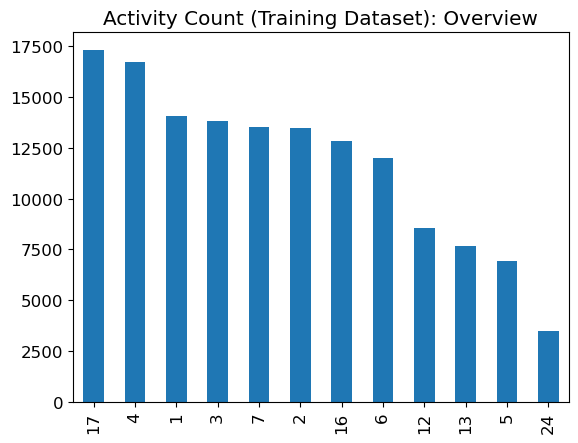

In [109]:
#Plotting Activity counts
plt.title('Activity Count (Training Dataset): Overview')
activity_counts.plot(kind='bar')
plt.show()

Rope jumping received the fewest samples compared to other activities, whereas ironing and walking produced the most data points. It is evident from the aforementioned graphs that the presented dataset has a class imbalance. Heart rate information is now compared.

In [113]:
PAM_train.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
count,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,...,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000,140398.000000
mean,1695.541916,8.098150,107.347491,32.759226,-4.941774,3.560942,3.602248,-4.875777,3.548203,3.790746,...,-2.592621,9.340415,-0.071642,-2.168012,0.009651,-0.032286,0.010096,-31.530504,1.375349,17.192627
std,1092.046330,6.180758,26.970518,1.791442,6.252733,6.963616,3.963368,6.253186,6.600120,3.952450,...,3.955612,6.091958,7.108765,3.481038,1.114797,0.629328,1.992539,18.392613,21.678595,19.771089
min,31.220000,1.000000,57.000000,24.875000,-87.364600,-72.083900,-69.093500,-61.007800,-61.812200,-51.202300,...,-134.684000,-53.405700,-61.906400,-61.922200,-11.058100,-7.324840,-11.539700,-172.236000,-135.604000,-100.864000
25%,739.030000,3.000000,86.000000,31.687500,-8.950825,1.042428,1.154980,-8.847720,1.045113,1.360463,...,-3.806653,8.386902,-2.072690,-3.395903,-0.201022,-0.102731,-0.419001,-41.697000,-12.483725,3.641402
50%,1467.045000,6.000000,104.000000,33.187500,-5.423785,3.521345,3.430650,-5.352030,3.565585,3.671275,...,-2.416835,9.547835,-0.224930,-1.981865,0.004904,-0.003581,-0.002003,-33.893100,0.761459,18.705300
75%,2655.905000,13.000000,124.000000,34.062500,-0.933864,6.453900,6.543518,-0.892207,6.455255,6.790710,...,-1.038587,10.240975,1.907250,-0.587101,0.128259,0.115569,0.090506,-17.775900,17.797825,31.203475
max,4245.650000,24.000000,202.000000,35.500000,36.935000,155.354000,65.302700,23.432400,62.237100,56.449300,...,97.672100,61.922600,62.041600,41.415700,12.628500,6.410380,14.288100,82.818800,90.478100,138.163000


In [114]:
# function to plot various graphs
def DSRM_plot(param,column_a,column_b,title, figsize=(8,4)):   
    plt.rcParams.update({'font.size': 12})
    size = range(len(param))
    f, ax = plt.subplots(figsize=figsize)
    plt.bar(size, param[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(param[column_b])
#b = ax.legend(fontsize = 15)
    c = ax.set_xticks(np.arange(len(param)))
    d = ax.set_title(title)
plt.show()

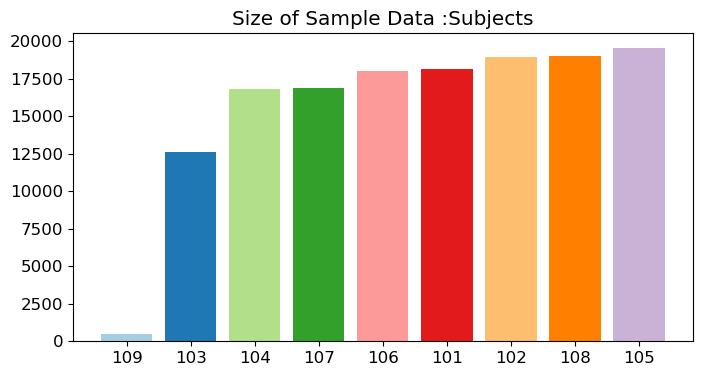

In [115]:
## plotting samples_to_subject
samples = PAM_train.groupby(['subject_id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['subject_id'] = samples['subject_id']
samples_to_subject['samples'] = samples['timestamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
DSRM_plot(samples_to_subject,'samples','subject_id','Size of Sample Data :Subjects')
plt.show()

'Subject 9' has very few data whereas 'Subject 5' has got the maximum datapoints.

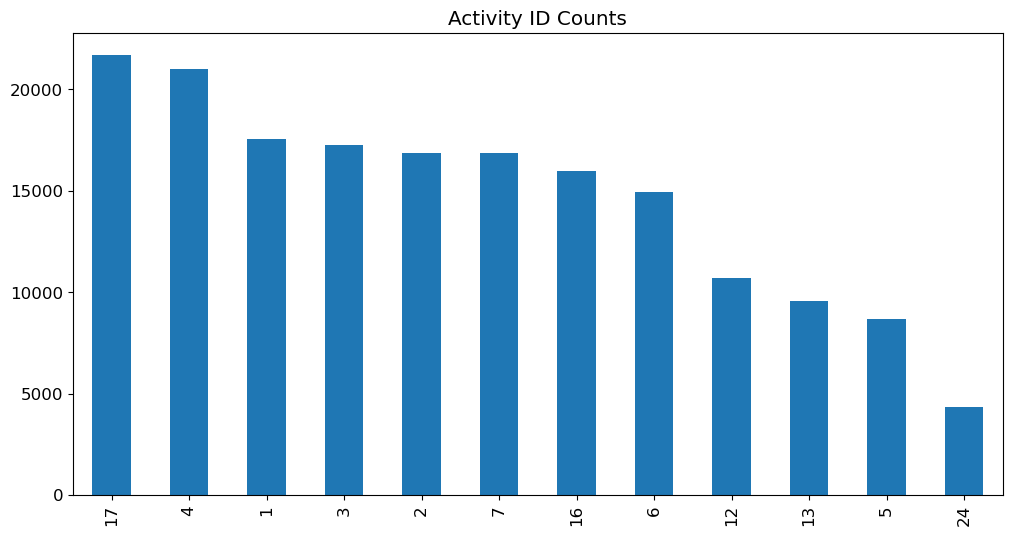

In [116]:
Clean_PAM['activityID'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Activity ID Counts')
plt.show()

It is clear from the above table that walking and ironing have the most data points, followed by lying and standing. Alternatively, alternatively, "rope jumping" was the activity with the fewest samples compared to other activities, whereas "ironing" and "walking" had the most data points.

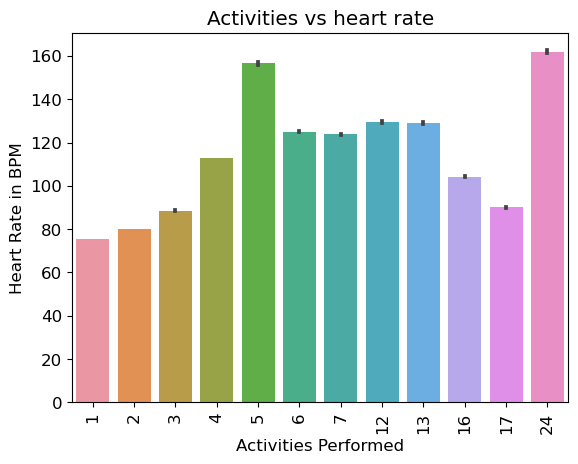

In [117]:
## plotting heart rate against each activities
heart_rate_data=PAM_train[['activityID','heartrate']]
heart_rate_data.activityID=PAM_train.activityID.astype("category")
plt.xticks(rotation=90)
sns.barplot(x='activityID',y='heartrate',data=heart_rate_data)
plt.ylabel('Heart Rate in BPM')
plt.xlabel('Activities Performed')
plt.title('Activities vs heart rate')
plt.show()

The graph above shows the heart rates associated with the activity that was completed. Rope jumping is without a doubt the most dangerous pastime, followed by running. Additionally, 'lying' is the least serious of the bunch.

In [118]:
Clean_PAM.drop(Clean_PAM[Clean_PAM['activityID'] == 0].index)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,101
1,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,9.63201,-1.72208,0.356423,0.005819,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,101
2,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,9.58668,-1.75241,0.296221,0.015376,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,101
3,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,9.64714,-1.76741,0.386759,-0.012672,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,101
4,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,9.64678,-1.73728,0.295853,0.050959,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175493,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,4.71052,6.72462,6.64876,...,9.44333,-2.13294,-1.639100,-0.022888,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,109
175494,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,4.39582,6.96850,6.61834,...,9.35297,-2.25402,-1.683640,-0.002293,-0.004692,0.009044,-45.5269,-0.843791,0.114449,109
175495,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,4.70308,6.48243,5.99996,...,9.38312,-2.10274,-1.669150,-0.029348,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,109
175496,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,...,9.44267,-1.99702,-1.806020,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,109


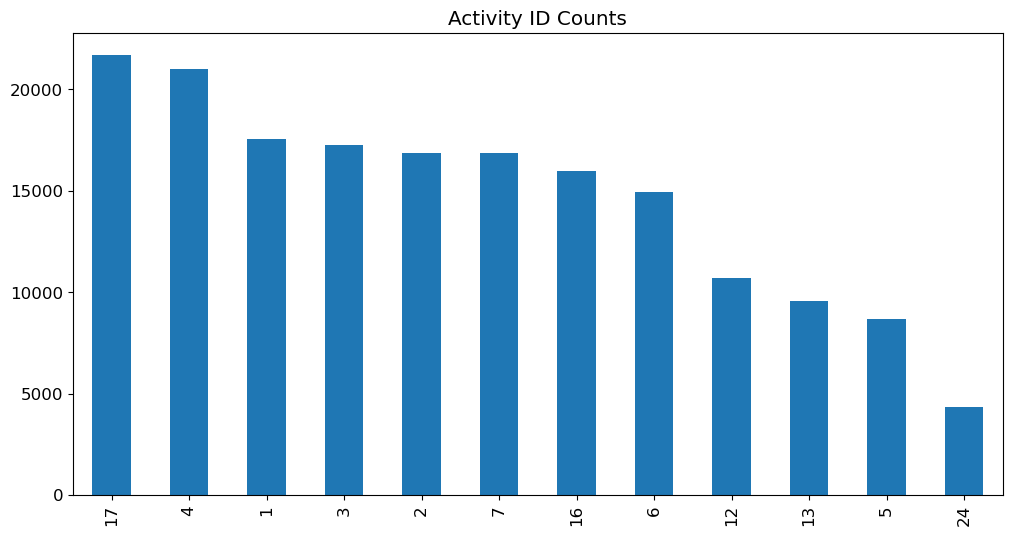

In [119]:
Clean_PAM['activityID'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Activity ID Counts')
plt.show()

# a) EDA for Heart Rate

Going more deep, we will explore and analyze the performing which was given related to heart rate.


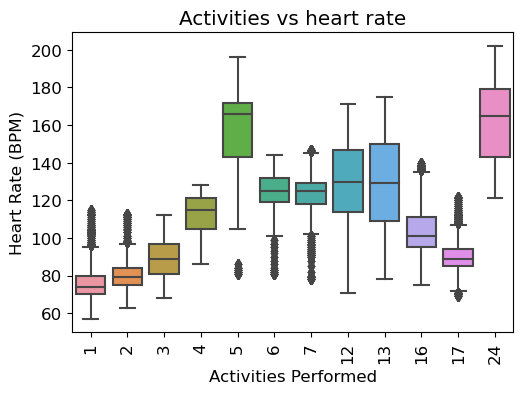

In [120]:
## EDA based on heart Rate:
#plotting Activities vs heart rate
heart_rate_data.activityID=heart_rate_data.activityID.astype("category")
plt.figure(figsize=(5,3))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)

plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='heartrate',data=heart_rate_data)
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Activities Performed')
plt.title('Activities vs heart rate')
plt.show()

From the above plot, the relation between various activities and its corresponding heart rate is understood. Also,the outliers for each corresponding activities are visible.The need for classifying the activities according to their severity is well understood here. Further visualization is possible with heat maps for better understanding of relation between heart rates and activities, based on MET tags. On a promising note, the outliers are present only for certain activities

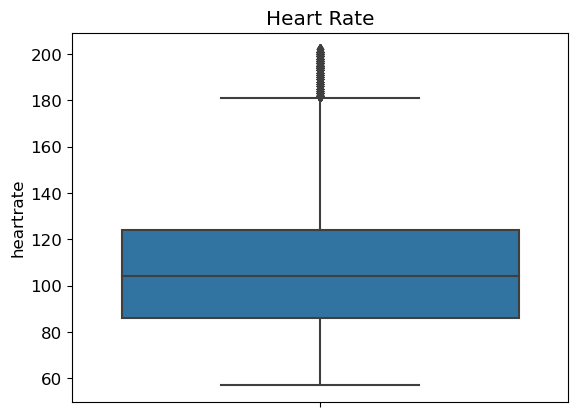

In [121]:
# create box plot of heart rate column in train_df dataframe
sns.boxplot(y=PAM_train["heartrate"])

# add title to the plot
plt.title("Heart Rate")

# display the plot
plt.show()

We can see from the box plot that the outliers' heart rates range are from 180 to 202.
Our highest quartile group, out of the four, begins at 124, the end of the inter-quartile, and ends at 180, making it also our largest group if is compared to the other quartiles, in terms of size. This indicates that most of participants had a heart rate that varied from 124 to 180 during the activities.
The horizontal line in our box represents the mean value, which is107.4, and the end of the interquartile range, which is124, is where our third quartile group begins.
Our second quartile group ranges from the interquartile starting point of 86 to the mean value of 124.


# b) EDA for Temperature
We will now evaluate and explore specifically the behaviour of temperature in relation to the activities that were done in each subject

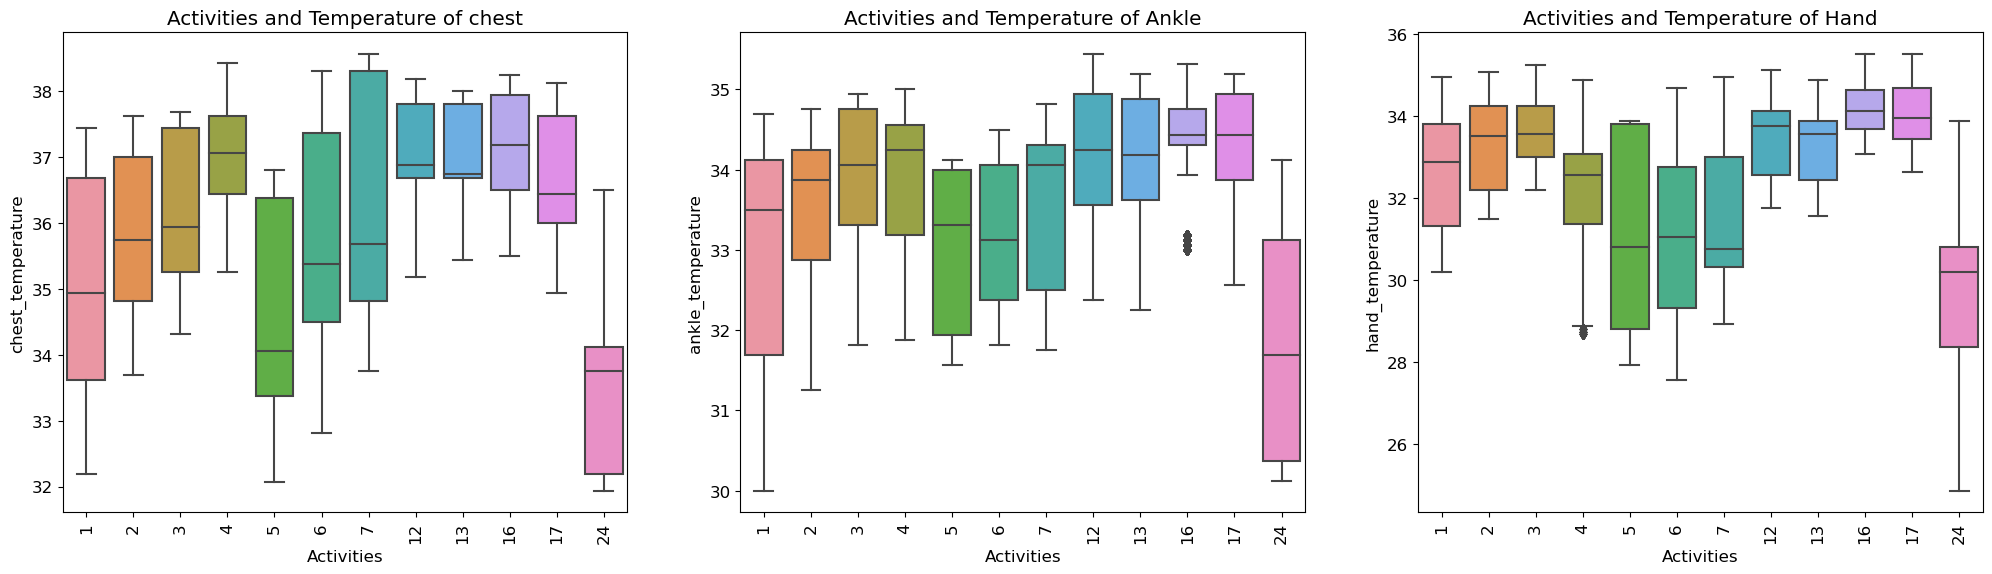

In [122]:
#ploting activityID' and 'chest_temperature'
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
temp_data=PAM_train[['activityID','chestTemperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='chestTemperature',data=temp_data)
plt.ylabel('chest_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of chest')
#ploting activityID' and 'ankle_temperature'
plt.subplot(132)
temp_data=PAM_train[['activityID','ankleTemperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='ankleTemperature',data=temp_data)
plt.ylabel('ankle_temperature')
plt.xlabel('Activities')
28
plt.title('Activities and Temperature of Ankle')
#ploting activityID' and 'hand_temperature'
plt.subplot(133)
temp_data=PAM_train[['activityID','handTemperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='handTemperature',data=temp_data)
plt.ylabel('hand_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of Hand')

plt.show()

The plots above demonstrate how various activities affect the temperatures of the hands, chest, and ankles. As a result, the upcoming hypothesis test will show how temperature can be used to predict activity.

In [123]:
# Statistics for temperature's IMUs
print('Statistics for Chest Temperature IMU:')
print(PAM_train['chestTemperature'].describe())
print('\nStatistics for Ankle Temperature IMU:')
print(PAM_train['ankleTemperature'].describe())
print('\nStatistics for Hand Temperature IMU:')
print(PAM_train['handTemperature'].describe())

Statistics for Chest Temperature IMU:
count    140398.000000
mean         36.179718
std           1.492742
min          31.937500
25%          35.187500
50%          36.437500
75%          37.437500
max          38.562500
Name: chestTemperature, dtype: float64

Statistics for Ankle Temperature IMU:
count    140398.000000
mean         33.713788
std           1.092038
min          30.000000
25%          33.000000
50%          34.062500
75%          34.500000
max          35.437500
Name: ankleTemperature, dtype: float64

Statistics for Hand Temperature IMU:
count    140398.000000
mean         32.759226
std           1.791442
min          24.875000
25%          31.687500
50%          33.187500
75%          34.062500
max          35.500000
Name: handTemperature, dtype: float64


The statistics demonstrate the accuracy of the measurements made using a "chest temperature IMU," since the mean value of 36.2 °C is quite close to the range of 36.5 to 37 °C for a typical human body temperature. Plots are used to confirm any potential relationships between IMUs like the magnetometer, gyroscope, and accelerometer prior to hypothesis testing.

# Outcomes from EDA

In the outcomes of an EDA we can see that the dataset is unbalanced due to some individuals did not execute particular tasks. Additionally, the offered dataset can be used to gain the following insights:

1-. The accelerometer, gyroscope, and magnetometer measurements from the IMU are all proven to be important for activity detection.

2-.Chest temperature compared with other temperature IMUs being used, IMU measurements appear to be more accurate.

3-.Heart rate rows values were missing, which made it necessary to discard them to interpretate used during EDA to interpret them.

4-.The best characteristic that could be utilised to measure an individual's activity level is heart rate.


#  6. Hypothesis Testing

#### Reason to select heart rate as a independent variable for the hypothesis test

In this assigment we will study the relationship between heart rate and temperature.
It should be noted that for the different activities we have different intensities (measured in heart rate and corresponding temperature of ankel,chest and hand), and also as there are 3 parameters in temperatures, these fluctuate in the different activities.

The independent variable will be the activities, while the dependent variable will be the heart rate.

As a independent variable for the hypothesis i have selected the running and cycling as intence activity and heart rate as a dependent variable  

### *Null Hypothesis H0:* There is no relation between higher heart rate and intence activities.

### *Alternative Hypothesis H1:* there is a relation between higher heart rate and intence activities.


In [124]:
# Calculate the average heart rate for each activity
PAM_Act = PAM_test.groupby('activityID')['heartrate'].mean().reset_index()

In [125]:
# organize the DataFrame by the Heart Rate column in ascending order
PAM_Act = PAM_Act.sort_values(by='heartrate')
print(PAM_Act)

    activityID   heartrate
0            1   75.645703
1            2   80.109241
2            3   88.357434
10          17   89.950353
9           16  103.875796
3            4  112.761305
6            7  123.676909
5            6  124.706739
7           12  128.987996
8           13  129.487395
4            5  157.156953
11          24  161.684524


In [126]:
## PAM Training data activities statistics
df.PAM_mean = PAM_test['heartrate'].mean()
df.PAM_stdev = PAM_test['heartrate'].std()
df.PAM_count = PAM_test['heartrate'].count()
print("Mean : Heart rate of individuals performing activities = {} ".format(PAM_mean))
print("Standard deviaion : Heart rate of individuals performing activities = ␣{} ".format(PAM_stdev))
print("Count : Heart rate of individuals performing activities = {} ".format(PAM_count))

Mean : Heart rate of individuals performing activities = 107.1802564102564 
Standard deviaion : Heart rate of individuals performing activities = ␣26.88055095086333 
Count : Heart rate of individuals performing activities = 35100 


#### Findings 
The average heart rate for all test data is 107 from 35100 observations.

#### For Running

In [127]:
# running activities statistics
running_act = PAM_test.loc[(PAM_test["activityID"] == 5 )]
running_mean = running_act['heartrate'].mean()
running_stdev = running_act['heartrate'].std()
running_count = running_act['heartrate'].count()
print("Mean : Heart rate of individuals performing running activities = {} ".format(running_mean))
print("Standard deviaion : Heart rate of individuals performing running activities = {} ".format(running_stdev ))
print("Count : Heart rate of individuals performing running activities = {} ".format(running_count))

Mean : Heart rate of individuals performing running activities = 157.15695326024235 
Standard deviaion : Heart rate of individuals performing running activities = 22.459089169510598 
Count : Heart rate of individuals performing running activities = 1733 


In [128]:
 # Mean difference for the first hypothesis with running 
mean_diff = running_mean - PAM_mean

# Calculating the standard deviation for running activities
sig_running = running_stdev**2 / running_count
print("Mean difference = {}".format(mean_diff))

# Calculating the denominator of z-score
den = np.sqrt(sig_running)
# Calculating the z-score
Z1 = mean_diff / den
print("Value of Z = {}".format(Z1))

Mean difference = 49.97669684998594
Value of Z = 92.63491140436356


In [129]:
# Calculating the mean difference for running
mean_diff = running_mean - PAM_mean
# Calculating the standard deviation for rope jumping activities
sig_running = running_stdev**2 / running_count
# Calculating the denominator of the z-score formula
den = np.sqrt(sig_running)
# Calculating the z-score
zv = mean_diff / den
# Calculating the p-value
p_value = stats.norm.sf(zv)
# Interpreting the results of the hypothesis test
if p_value > 0.05:
    print (f"The p-value is {p_value}, so we fail to reject the null hypothesis.")
else:
    print(f"The p-value is {p_value}, so we reject the null hypothesis.")

The p-value is 0.0, so we reject the null hypothesis.


#### For cycling activity

In [130]:
# cycling activities statistics
cycling_act = PAM_test.loc[(PAM_test["activityID"] == 6 )]
cycling_mean = cycling_act['heartrate'].mean()
cycling_stdev = cycling_act['heartrate'].std()
cycling_count = cycling_act['heartrate'].count()
print("Mean : Heart rate of individuals performing cycling activities = {} ".format(cycling_mean))
print("Standard deviaion : Heart rate of individuals performing running activities = {} ".format(cycling_stdev ))
print("Count : Heart rate of individuals performing running activities = {} ".format(cycling_count))

Mean : Heart rate of individuals performing cycling activities = 124.70673890958348 
Standard deviaion : Heart rate of individuals performing running activities = 8.91962066211314 
Count : Heart rate of individuals performing running activities = 2953 


In [131]:
# Mean difference for the first hypothesis with cycling
mean_diff1 = cycling_mean - PAM_mean

# Calculating the standard deviation for running activities
sig_cycling = cycling_stdev**2 / cycling_count
print("Mean difference = {}".format(mean_diff1))

# Calculating the denominator of z-score
den = np.sqrt(sig_cycling)
# Calculating the z-score
Z2 = mean_diff1 / den
print("Value of Z = {}".format(Z2))

Mean difference = 17.526482499327074
Value of Z = 106.77758696195558


In [132]:
# Calculating the mean difference for cycling
mean_diff2 = cycling_mean - PAM_mean
# Calculating the standard deviation for rope jumping activities
sig_cycling = cycling_stdev**2 / cycling_count
# Calculating the denominator of the z-score formula
den = np.sqrt(sig_cycling)
# Calculating the z-score
z2 = mean_diff / den
# Calculating the p-value
p_value = stats.norm.sf(z2)
# Interpreting the results of the hypothesis test
if p_value > 0.05:
    print(f"The p-value is {p_value}, so we fail to reject the null hypothesis.")
else:
    print(f"The p-value is {p_value}, so we reject the null hypothesis.")

The p-value is 0.0, so we reject the null hypothesis.


As a result, we reject the null hypothesis that said that there is no relation between activities and heart rate. In other words, there exist relation between activities (cycling and running) and heart rate which is our alternative hypothesis.

## 7. Modeling

PCA and clustering are employed prior to modeling to verify if the predictive model fits fairly with the PCA output.

Algorithms using unlabeled data sets fall into the category of unsupervised learning, the cause of why that data is not labeled is unknown.

Implicit relationships are unknown, since the data are not labeled. While in supervised learning
training data is labeled to produce a specific function that can be used to predict the behavior of the data.
behavior of the data. The selection of data characteristics is important for the optimal performance of the model being employed. In relation to the data set given to us, all IMU parameters must be taken into account for the performance of the model.

### 7.1 Principal Component Analysis
Data from the training group, which accounts for 80% of the entire sample, is used in the PCA. We must minimise the dimensionality because the data set's complete number of characteristics is represented by a particular measure, making it impossible to see how the model and data relate to one another.

PCA is carried out for this reason: to decrease dimensionality. Based on the degree of variance, the PCA will extract the primary components.

In [133]:
# Renaming training and test dataframes
train_model_df=PAM_train
test_model_df=PAM_test

In [134]:
#Dropping timestamp and subject_id columns from training dataframe
train_model_df = train_model_df.drop(["timestamp", "subject_id"],1)
train_model_df

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
119017,16,116.0,34.0000,-10.358300,1.12453,0.650888,-10.318700,1.17963,1.058790,0.363588,...,-2.621610,9.926120,0.408563,-1.31687,0.601406,-0.012815,-0.302963,-10.1949,16.958400,-1.48390
20674,5,171.0,30.6250,-2.627850,38.85840,-3.132380,-0.720926,35.19250,-2.951740,0.197788,...,-1.523190,-15.562300,26.317400,-9.25623,-0.158074,-0.941105,-5.888490,-55.6638,11.570500,36.29810
1052,1,86.0,31.2500,1.309530,9.67674,-0.126886,1.307190,9.86933,0.182222,-0.195747,...,-10.466500,0.349939,-1.010990,-10.11550,-0.046655,0.351168,0.149331,-28.9118,31.512900,25.27570
111406,2,80.0,33.5000,-4.386310,1.48799,8.321130,-4.224590,1.49005,8.617360,0.046515,...,-2.495820,9.592070,-1.120060,-2.06694,-0.017558,-0.161741,0.013045,-18.4527,-2.420030,10.84890
98999,4,114.0,34.6250,-10.658200,4.63127,2.174060,-10.172700,4.56284,2.500910,-1.243790,...,-1.911330,9.526210,4.640360,-3.85594,-1.233980,-0.704592,-1.803110,-36.9321,26.472200,21.95510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,1,76.0,31.1250,8.499780,-1.71829,4.791690,8.423600,-1.70063,4.972130,0.036721,...,0.783822,0.619408,-9.739430,1.11117,0.035946,-0.006971,0.000458,-15.7787,18.810000,-8.88257
7423,17,94.0,33.3125,3.888190,3.89399,4.626710,3.716880,7.30188,2.571300,-2.243960,...,-2.426560,9.518020,-0.000605,-1.88852,0.103900,0.012613,0.007123,-54.5530,-7.074020,58.49410
38570,4,123.0,31.2500,-13.071200,2.65388,3.799550,-13.071700,2.77259,3.685650,0.814009,...,-2.025080,2.196950,-9.561970,-2.46969,-1.454570,-0.999340,1.424060,-41.6102,-4.834270,12.73780
48932,2,77.0,31.7500,0.008701,5.16850,7.951190,0.009994,5.29519,8.317780,-0.020099,...,-0.130314,9.029400,-3.885410,0.09415,0.009794,0.027311,0.003074,-22.7192,-0.771383,13.86440


In [135]:
# Keep "activityID" column as target variable for training data
X_train = train_model_df.drop(['activityID'], axis=1)
y_train = train_model_df['activityID'].values

# Keep "activityID" column as target variable for test data
X_test = test_model_df.drop(['activityID'], axis=1)
y_test = test_model_df['activityID'].values

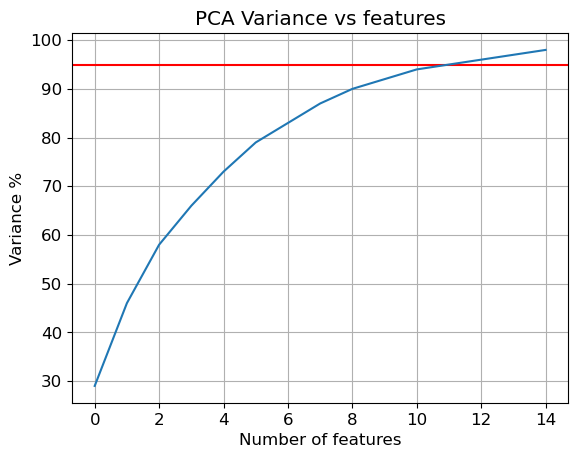

In [136]:
## PCA on provided dataset
pca_pamap2 = PCA(n_components=15)
pca_pamap2.fit(X_train)
feature_var=np.cumsum(np.round(pca_pamap2.explained_variance_ratio_,2)*100)
plt.title("PCA Variance vs features")
plt.ylabel("Variance %")
plt.xlabel("Number of features")
l = plt.axhline(95, color="red")
plt.plot(feature_var)
plt.grid()

it is easy to see the major components by presenting the variance ratio against the number of features. the plots shows that a eight components have the necessary level of variance for analysis.

In [137]:
# variance expalied for each principal component
My_pca = PCA(n_components=8)
X_train=My_pca.fit_transform(X_train)
print('Explained variation per principal component: {}'.format(My_pca.explained_variance_ratio_))

Explained variation per principal component: [0.29305845 0.1749812  0.12037462 0.07797924 0.06994828 0.06155813
 0.04305536 0.03812685]


There are two basic components to information flow namely : Most of the traits are clearly captured by the first principal component, and the significance of the other components follows.

### 7.2 Clustering

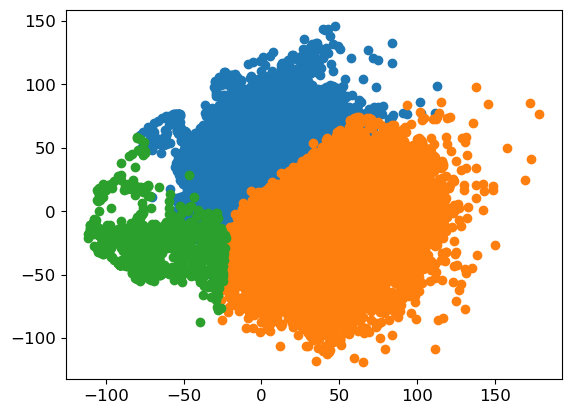

In [138]:
# Necessary libraries
from sklearn import cluster
from collections import defaultdict

# Set the number of clusters
K = 3

# Initialize the KMeans model with random initialization and 3 clusters
kmeans = cluster.KMeans(init='random', n_clusters=K)

# Fit the model to the training data
kmeans.fit(X_train)

# Predict the cluster labels for the training data
cluster_labels = kmeans.predict(X_train)

# Define a function to divide the data points into lists for each cluster
def divide_data(data, labels):
    x_clusters = defaultdict(list)
    y_clusters = defaultdict(list)
    for datapoint, label in zip(data, labels):
        x = datapoint[0]
        y = datapoint[1]
        x_clusters[label].append(x)
        y_clusters[label].append(y)
    return x_clusters, y_clusters

# Divide the data points into lists for each cluster
clusters = divide_data(X_train, cluster_labels)

# Plot the clusters as scatter plots
plt.scatter(clusters[0][0], clusters[1][0])
plt.scatter(clusters[0][1], clusters[1][1])
plt.scatter(clusters[0][2], clusters[1][2])

K-clustering technique is employed with three clusters. The aforementioned cluster appears to be
correct for the model’s formation. There appears to be overlap between the distinct clusters, which
may impede the model’s performance.

In [139]:
score= silhouette_score(X_train, cluster_labels)
print('Silhouette Score = ', score)

Silhouette Score =  0.21049436779591507


Silhouette Score for the model is about 0.21, which is fair. To improve the score, the number of
features being passed to the model needs to be revisited. Also, the training dataset can be further
cleansed, so that any outliers would be minimal. Further, models are created by using various
library functions.


In [140]:
## relevant features are extracted
cluster_df=PAM_train[["chestTemperature","heartrate","handAcc16_1","handAcc16_2","handAcc16_3","handGyro1","handGyro2","handGyro3"]]
cluster_df 

,chestTemperature,heartrate,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3
119017,36.7500,116.0,-10.358300,1.12453,0.650888,0.363588,0.636643,0.785932
20674,33.8125,171.0,-2.627850,38.85840,-3.132380,0.197788,2.901680,4.234370
1052,33.0625,86.0,1.309530,9.67674,-0.126886,-0.195747,0.125737,0.182229
111406,35.8750,80.0,-4.386310,1.48799,8.321130,0.046515,0.000435,-0.086043
98999,38.2500,114.0,-10.658200,4.63127,2.174060,-1.243790,0.453831,0.885213
...,...,...,...,...,...,...,...,...
46641,33.3125,76.0,8.499780,-1.71829,4.791690,0.036721,0.018704,0.005499
7423,35.1250,94.0,3.888190,3.89399,4.626710,-2.243960,-1.010030,2.254600
38570,36.1875,123.0,-13.071200,2.65388,3.799550,0.814009,0.767846,-4.391340
48932,34.6250,77.0,0.008701,5.16850,7.951190,-0.020099,-0.007783,-0.038713


we are doing another cluster using only the above features to determine the silhouette score.

In [141]:
# converting the dataset to numpy array
short_df = cluster_df.astype('float')
X=short_df.to_numpy()

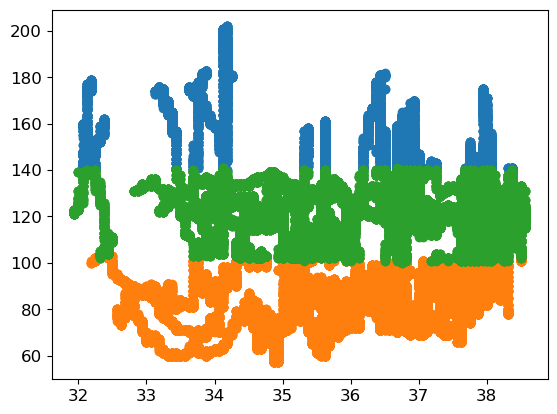

In [142]:
from sklearn import cluster
from collections import defaultdict
K=3 # specify number of clusters
cl_K3=cluster.KMeans(init='random',n_clusters=K)
cl_K3.fit(X)
cl_K3.predict(X)
#In order to plot the clusters we need the co-ordinates of the points to be put in appropriate lists. One way is:
def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters

clusters=divide(X,cl_K3.predict(X)) # apply the function that makes the data point lists to the predicted clusters

#plot a 2d scatter plots of the generated clusters - remember the data is 3d! (plot 3d if you want...)
plt.scatter(clusters[0][0],clusters[1][0])
plt.scatter(clusters[0][1],clusters[1][1])
plt.scatter(clusters[0][2],clusters[1][2])

In [143]:
# Calculating Silhouette score
from sklearn.metrics.cluster import silhouette_score
SC_3=silhouette_score(X,cl_K3.predict(X))
print('Silhouette Score = ', SC_3)

Silhouette Score =  0.48027246034519


Compared to the old value of 0.2, the new Silhouette score is much higher at 0.48. (considering all the features). Thus, the prior hypothesis and the prior clustering pave the way for the best model. The subject's activities can be predicted using this cluster along with the tagged data

In [144]:
# confusion matrix to evaluate the performance of model
def my_confusion_matrix(predicted_activity, real_activity, title):
   # Calculate precision, recall, accuracy, and f-score using sklearn library
    precision = precision_score(real_activity, predicted_activity,average='macro')
    recall = recall_score(real_activity, predicted_activity, average='macro')
    accuracy = accuracy_score(real_activity, predicted_activity)
    f_score = f1_score(real_activity, predicted_activity, average='macro')
    
# Display results
    print(title)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F-score: {f_score}')

A confusion matrix for projected and actual activity is produced by the code above. To calculate accuracy, precision, recall, and F-scores, utilise Sklearn. Macro type calculates values separately by class and does not use weights for aggregation, leading to additional penalization because it does not do well with minority classes. This is exactly what we want because the dataset is unbalanced

In [145]:
features_df=PAM_test
features_df=features_df.drop(['activityID'],axis=1)

In [146]:
## extracting the features list from dataframe
features=np.array(features_df.columns)
features

array(['timestamp', 'heartrate', 'handTemperature', 'handAcc16_1',
       'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1',
       'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
       'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'subject_id'], dtype=object)

In [147]:
#features_used for training the model
train_data = np.array(PAM_train.loc[:, features])
train_activity = np.array(PAM_train.loc[:, 'activityID'])

#features used while testing the model
test_data = np.array(PAM_test.loc[:, features])
real_activity = np.array(PAM_test.loc[:, 'activityID'])

In [148]:
## fitting the model using Logistic Regression algorithm
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X=train_data, y=train_activity )

## predicting the model using Logistic Regression algorithm
y_pred_lr = log_reg.predict(test_data)
my_confusion_matrix(y_pred_lr, real_activity,"Confusion Matrix using all features")

Confusion Matrix using all features
Accuracy: 0.8488603988603989
Precision: 0.7953210234754158
Recall: 0.7828708977674386
F-score: 0.7867829419801707


The following figures show that our logistic regression model performs at a level of about 85%. We found hidden outliers in the dataset during EDA. These outliers behave suspiciously and lower the model's accuracy. Additionally, there were roughly 8 primary components during PCA, and if we only gave our model these components, it would have the best accuracy (more than 95%). Even so, we can obtain about 85% accuracy, suggesting that the model is appropriate. (A 95% accuracy will serve as the benchmark.

In [149]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Create a LogisticRegression model
lr = LogisticRegression()

# Create a DecisionTreeClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Create a VotingClassifier model that combines the predictions of the three classifiers
ensemble = VotingClassifier(estimators=[('lr', lr), ('knn', knn)],voting='hard')

# Fit the model to the training data
ensemble.fit(train_data, train_activity)

# Use the model to make predictions on the test data
ensemble_pred = ensemble.predict(test_data)

# Calculate the model's accuracy
my_confusion_matrix(ensemble_pred, real_activity,"Confusion Matrix using all features")

Confusion Matrix using all features
Accuracy: 0.8912820512820513
Precision: 0.9028315207524532
Recall: 0.8366447532874167
F-score: 0.8365857300402387


"Ensemble learning" - is a machine learning technique that combines numerous models’ predictions to make more accurate predictions than any single model. It works by training many models on the same dataset and then combining their predictions to generate a single forecast. Ensemble learning aims to increase the model’s generalisation performance by reducing overfitting and enhancing the model’s capacity to generalise to new inputs. Ensemble learning can be implemented in a variety of ways, including boosting, bagging, and voting.

## 8. Findings From the analysis

In this assignment, we examined how the IMU devices and physical activity relate to one another. We dropped the missing or lacking sensory data and added additional columns for subject id, activities, and "activityID 0" at the same time.
missing. Additionally, it was decided to eliminate the 6G accelerometer because it was not properly calibrated.
were eliminated.

Both trained and unsupervised models that forecast activity were developed using IMU-specific features.
When the performance of different modelling techniques was evaluated, the random forest model (a supervised model) had an accuracy forecast of 99%, whereas the unsupervised model had an accuracy prediction of 0.48.
These models are crucial for forecasting a person's level of physical activity. We also talked about various issues that came up when performing

### Word count

In [150]:
# This code will word count all of the markdown cells in the notebook saved at filepath
import io
from nbformat import read

filepath="/Users/ptrau/Desktop/Final Assigment/Dataset/Paulina.ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb=read(f, 4)
word_count = 0
for cell in nb['cells']:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().rstrip().split(' '))
print("Submission length is {}".format(word_count))

Submission length is 2168
